# **Importing Necessary Libraries**

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# **Reading The Data**

In [2]:
df = pd.read_csv("./Tesla.csv", parse_dates=True, index_col="Date")
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [4]:
print(df.shape)
df.info()

(1692, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5 KB


# **Data Visualization**

<Axes: >

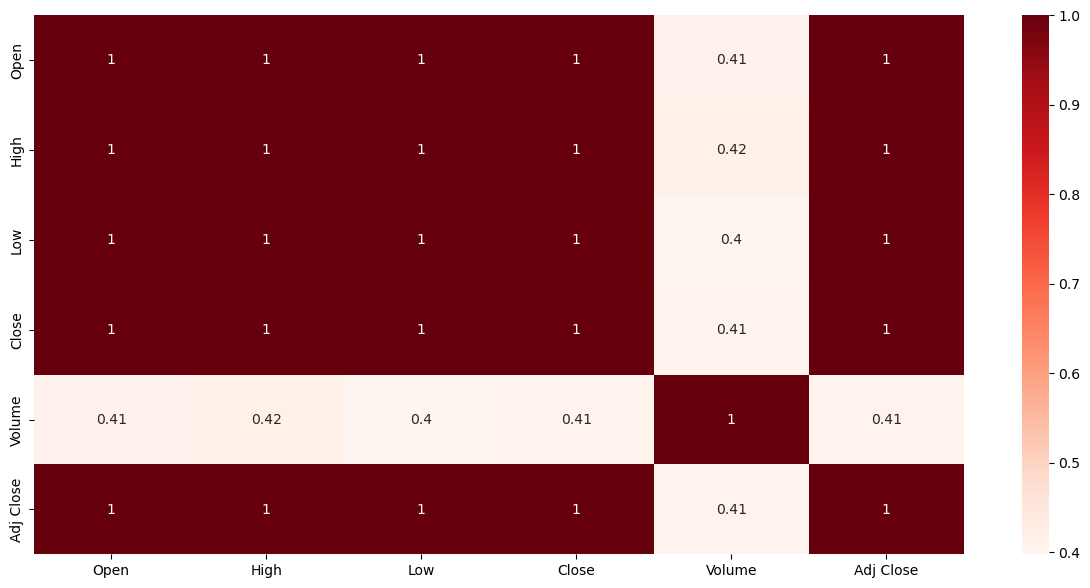

In [5]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, cbar=True, cmap="Reds")


Text(0, 0.5, 'Close Price USD')

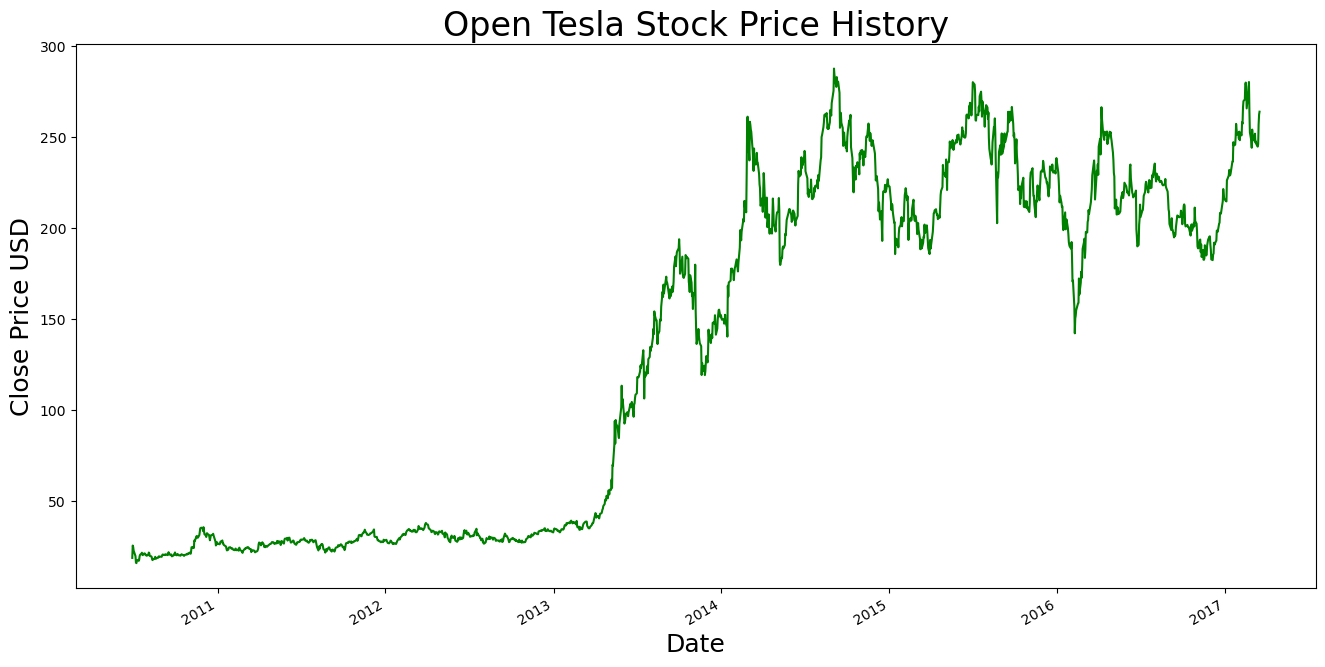

In [6]:
df["Open"].plot(figsize=(16, 8), color='green')
plt.title("Open Tesla Stock Price History", fontsize=24)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD", fontsize=18)

[ 16.139999  16.4       17.389999 ... 282.98999  284.01001  287.670013] This is the Sorted data of Open Share Price


Text(0, 0.5, 'Frequency')

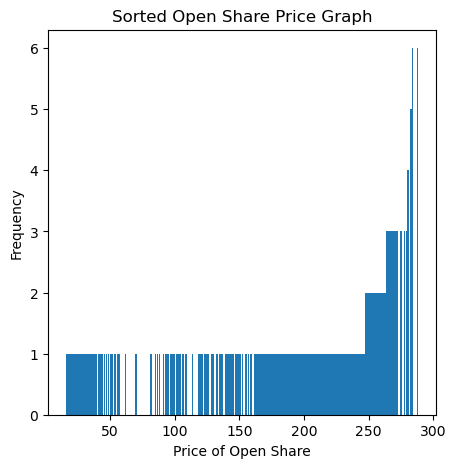

In [7]:
print(np.sort(df["Open"]), "This is the Sorted data of Open Share Price")
plt.figure(figsize=(5, 5))
plt.bar(list(np.sort(df["Open"].value_counts().keys())), list(np.sort(df["Open"].value_counts())))
plt.title("Sorted Open Share Price Graph")
plt.xlabel("Price of Open Share")
plt.ylabel("Frequency")

# **Data Preprocessing**

In [8]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Volume       False
Adj Close    False
dtype: bool

#### **Choosing Prediction Column**

In [9]:
dataset = df["Open"]
dataset = pd.DataFrame(dataset)

data = dataset.values

data.shape

(1692, 1)

#### **Normalizing The Data**

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

#### **Splliting The Data**

In [11]:
len(data)

1692

In [12]:
# 75% of the data fror Training and 25% of the data for Testing
train_size = int(len(data)*.75)
test_size = len(data) - train_size

print("Train size :",train_size, "Test size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train size : 1269 Test size : 423


In [13]:
train_data.shape, test_data.shape

((1269, 1), (483, 1))

# **Creating Training Set**

In [14]:
# Creating a Training Set with 60 time-steps and 1 output
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [15]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
# Reshaping the Input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [17]:
x_train.shape, y_train.shape

((1209, 60, 1), (1209,))

# **Building LSTM Model**

In [18]:
# Creating a LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

C:\Users\ABINAYA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,465 (165.88 KB)

 Trainable params: 42,465 (165.88 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Fitting the LSTM-Model to Training set
callbacks = [EarlyStopping(monitor="loss", patience=10, restore_best_weights=True)]
history = model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks=callbacks)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0014 - mean_squared_error: 0.0014 
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0011 - mean_squared_error: 0.0011         
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0012 - mean_squared_error: 0.0012        
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0011 - mean_squared_error: 0.0011         
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 9.6799e-04 - mean_squared_error: 9.6799e-04 
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 8.8964e-04 - mean_squared_error: 8.8964e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0011 - mean_squared_error: 0.0011        
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 9.0153e-04 - mean_squa

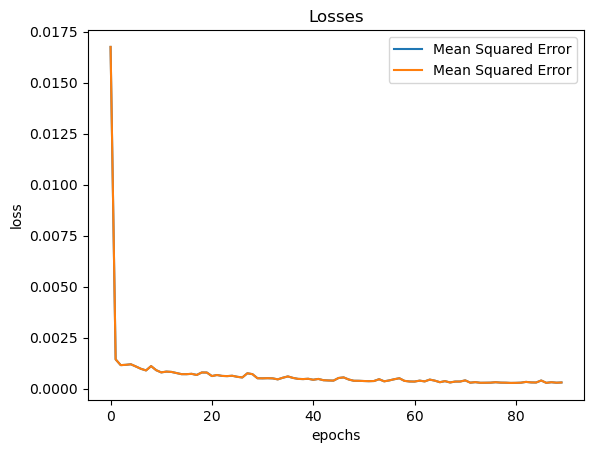

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_squared_error"])
plt.legend(['Mean Squared Error', "Mean Squared Error"])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# **Creating Testing Set**

In [22]:
# Creating a Testing Set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [23]:
# Convert to numpy array
x_test, y_test = np.array(x_test), np.array(y_test)

In [24]:
# Reshaping the Input
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
x_test.shape, y_test.shape

((423, 60, 1), (423,))

# **Predicting Testing Data**

In [26]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step 


(423, 1)

#### **Root Mean Square Error**

In [27]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

np.float64(1.86)

# **Visualize Predictions with The Data**

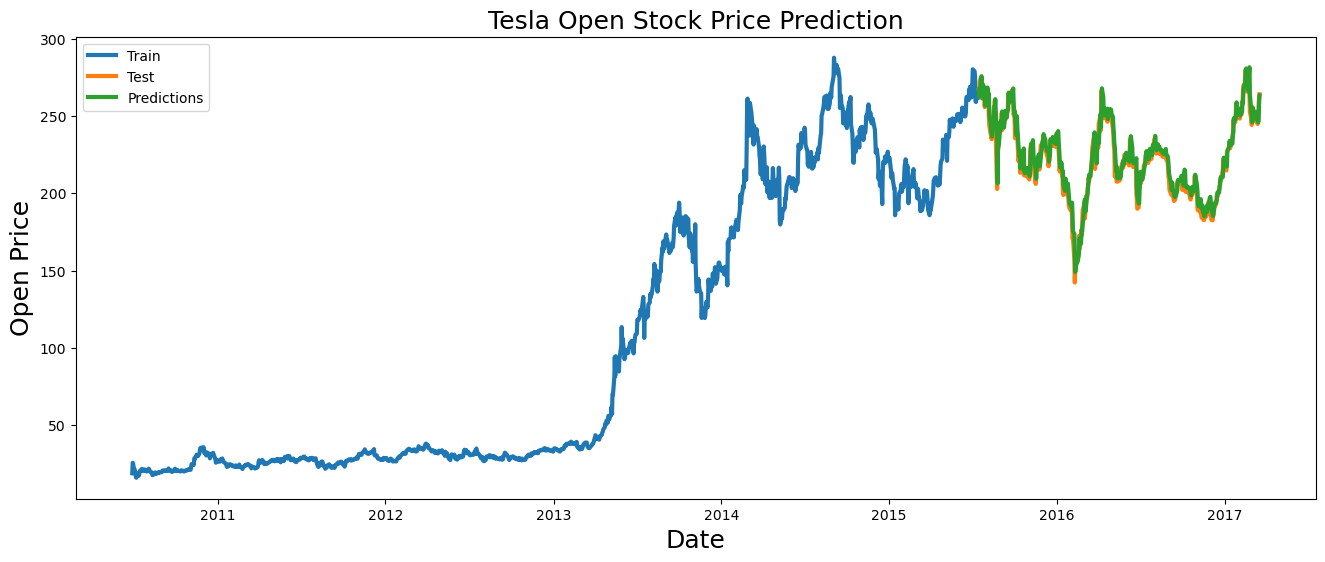

In [28]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Tesla Open Stock Price Prediction' , fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price' ,fontsize=18)
plt.plot(train['Open'],linewidth=3)
plt.plot(test['Open'],linewidth=3)
plt.plot(test["Predictions"],linewidth=3)
plt.legend(['Train','Test','Predictions'])

In [29]:
model.save("tesla_stock_prediction_model.keras")

In [30]:
from tensorflow.keras.models import load_model

In [31]:
load_model("tesla_stock_prediction_model.keras")

<Sequential name=sequential, built=True>